# Python training UGA 2017

**A training to acquire strong basis in Python to use it efficiently**

Pierre Augier (LEGI), Cyrille Bonamy (LEGI), Eric Maldonado (Irstea), Franck Thollard (ISTerre), Oliver Henriot (GRICAD), Christophe Picard (LJK), Loïc Huder (ISTerre)

# Python scientific ecosystem
# A short introduction to Matplotlib ([gallery](http://matplotlib.org/gallery.html))

The default library to plot data is **matplotlib**.
It allows one the creation of graphs that are ready for publications with the same functionality than Matlab.

In [1]:
# these ipython commands load special backend for notebooks 
# (do not use "notebook" outside jupyter)
# %matplotlib notebook
# for jupyter-lab:
# %matplotlib ipympl
%matplotlib inline

When running code using matplotlib, it is highly recommended to start ipython with the option `--matplotlib` (or to use the magic ipython command `%matplotlib`).

## Basic plotting with `plot`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
y = np.random.random(5)
print(y)

[0.63794816 0.54286835 0.20436206 0.07338781 0.24117945]


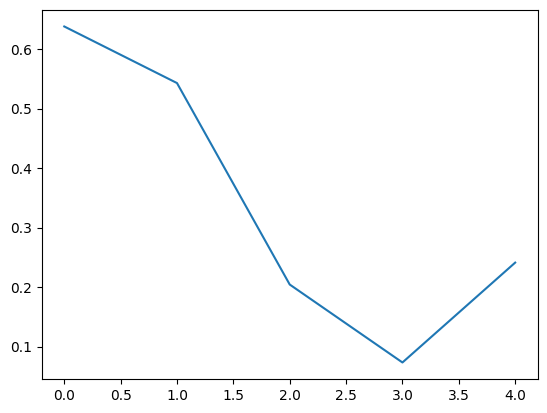

In [4]:
lines = plt.plot(y)

In scripts, the `plt.show` method needs to be invoked at the end of the script.

In [5]:
plt.show()

## Giving specific coordinates

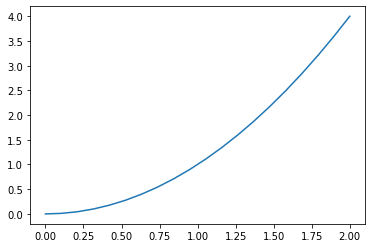

In [6]:
x = np.linspace(0, 2, 20)
y = x**2

plt.figure()
plt.plot(x, y)

## Figures and subplots

We can associate the figure and the system of axes to objects. These objects will allow us to add labels, modify the axis or save the figure.

The `Figure` object (in `fig`) handles the whole figure while the `AxesSubplot` object (in `ax`) handles the axes' system (called a subplot in matplotlib).

Text(0, 0.5, '$\\Pi / \\epsilon$')

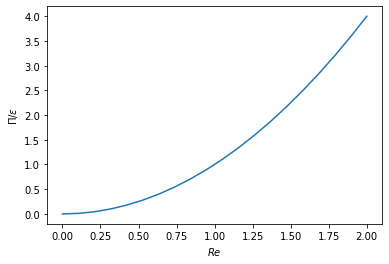

In [7]:
fig, ax = plt.subplots()
# Old syntax:
# fig = plt.figure()
# ax = fig.add_subplot(111)
ax.plot(x, y)

# Example: Change x and y labels
ax.set_xlabel('$Re$')
ax.set_ylabel('$\Pi / \epsilon$')

### Multiple subplots

Text(0.5, 0, 'Angle (rad)')

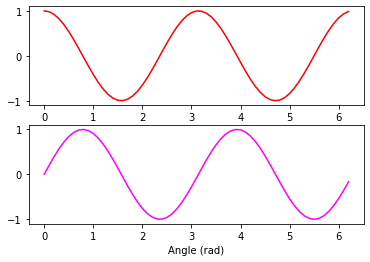

In [8]:
fig, subplots = plt.subplots(nrows=2, ncols=1)
ax1, ax2 = subplots
X = np.arange(0, 2*np.pi, 0.1)
ax1.plot(X, np.cos(2*X), color="red")
ax2.plot(X, np.sin(2*X), color="magenta")
ax2.set_xlabel('Angle (rad)')

### Customization options

There are a lot ! 
> Matplotlib tries to make easy things easy and hard things possible.

See the documentation of [`plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) for more details.

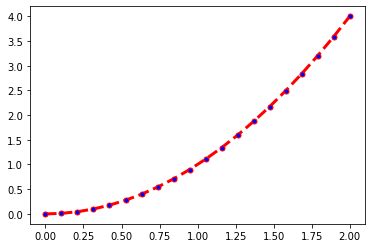

In [9]:
fig, ax = plt.subplots()
res = ax.plot(x, y, color="red", linestyle='dashed', linewidth=3, marker='o',
        markerfacecolor='blue', markersize=5)

We can also recover the plotted matplotlib object to get info on it.

In [10]:
line_object = res[0]
print(type(line_object))
print('Color of the line is', line_object.get_color())
print('X data of the plot:', line_object.get_xdata())

<class 'matplotlib.lines.Line2D'>
Color of the line is red
X data of the plot: [0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]


### Titles, labels and legends

Titles can be added to figures and subplots. Labels can be added when plotting to generate a legend afterwards.

Text(0.5, 0.98, 'FIGURE')

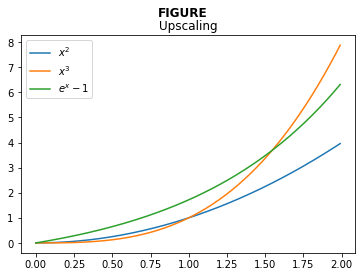

In [11]:
x = np.arange(0, 2, 0.01)

fig, ax = plt.subplots()
ax.plot(x, x**2, label='$x^2$')
ax.plot(x, x**3, label='$x^3$')
ax.plot(x, np.exp(x) - 1, label='$e^{x} - 1$')
ax.set_title('Upscaling')
ax.legend()
fig.suptitle('FIGURE', fontweight='bold')

Note that legends are attached to subplots. Note also the difference between the subplot title and the title of the figure.

## Anatomy of a Matplotlib figure

![Anatomy of a figure](images/anatomy.png)

For consistent figure changes, define your own stylesheets that are basically a list of parameters to tune the aspect of the figure elements.
See https://matplotlib.org/tutorials/introductory/customizing.html for more info.

## 2D plots

There are two main methods: 
- `imshow`: for square grids. X, Y are the center of pixels and (0,0) is top-left by default.
- `pcolormesh` (or `pcolor`): for non-regular rectangular grids. X, Y are the corners of pixels and (0,0) is bottom-left by default.

In [12]:
noise = np.random.random((10,10))

f, subplots = plt.subplots(1, 2)
subplots[0].imshow(noise)
subplots[1].pcolormesh(noise)

We can also add a colorbar and adjust the colormap.

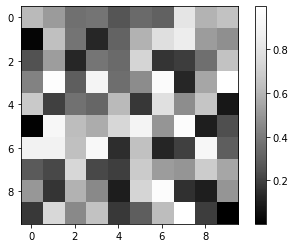

In [13]:
plt.figure()
plt.imshow(noise, cmap='Greys_r')
plt.colorbar()

### Generate meshes with `meshgrid`

When in need of plotting a 2D function, it is useful to use `meshgrid` that wil generate a 2D mesh from the values of abscissas and ordinates

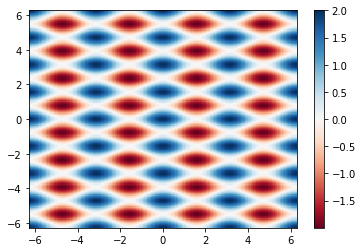

In [14]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
y = x

meshX, meshY = np.meshgrid(x, y)
Z = np.cos(2*meshX) + np.cos(4*meshY)

plt.figure()
plt.pcolormesh(meshX, meshY, Z, cmap='RdBu')
plt.colorbar()

### Choosing colormaps

When doing such colorplots, it is easy to lose the interesting features by setting a colormap that is not adapted to the data. As a rule of thumb:
- use **sequential** colormaps for data varying continously from a value to another (ex: x^2 for positive values)
- use **divergent** colormaps for data varying around a mean value (ex: cos(x))

Also, when producing scientific figures, think about how will your plot will look like to colorblind people or in greyscales (as it can happen in printed articles...).

See the interesting discussion on matplotlib website: https://matplotlib.org/users/colormaps.html.

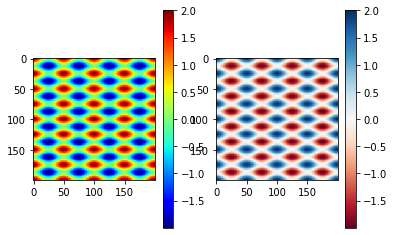

In [15]:
f, subplots = plt.subplots(1, 2)
plot1 = subplots[0].imshow(Z, cmap=plt.cm.jet)
f.colorbar(plot1, ax=subplots[0])
plot2 = subplots[1].imshow(Z, cmap=plt.cm.RdBu)
f.colorbar(plot2, ax=subplots[1])

## Other plot types
Matplotlib also allows to plot:
- Histograms
- Plots with error bars
- Box plots
- Contours
- in 3D
- ...

See the [gallery](http://matplotlib.org/gallery.html) to see what suits you the most.

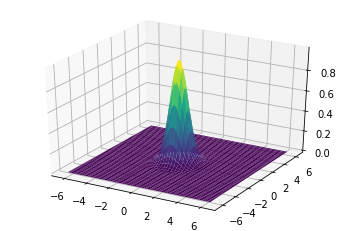

In [16]:
# 3D example
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(meshX, meshY, np.exp(-(meshX**2+meshY**2)), cmap='viridis')

## Do it yourself:

The pratical work below is mostly manipulation of an image (2D data). See TP5 for manipulation/plotting of 1D data.

With miscellaneous routines of scipy, we can get an example image:

In [17]:
import scipy.misc
raccoon = np.array(scipy.misc.face())

Write a script to print shape and dtype the raccoon image. Next plot the image using matplotlib.

In [18]:
print("shape of raccoon = ", raccoon.shape)
print("dtype of raccoon = ", raccoon.dtype)

shape of raccoon =  (768, 1024, 3)
dtype of raccoon =  uint8


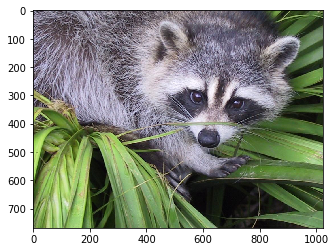

In [19]:
plt.imshow(raccoon)

0. Write a script to generate a border around the raccoon image (for example a 20 pixel size black border; black color code is 0 0 0)

1. Do it again without losing pixels and generate then a raccoon1 array/image

2.  1. Mask the face of the raccoon with a grey circle (centered of radius 240 at location 260 690 of the raccoon1 image; grey color code is for example (120 120 120))
    2. Mask the face of the raccon with a grey square by using NumPy broadcast capabilities (height and width 480 and same center as before)

3. We propose to smooth the image : the value of a pixel of the smoothed image is the the average of the values of its neighborhood (ie the 8 neighbors + itself).


### Solution 0 

Write a script to generate a border around the raccoon image (for example a 20 pixel size black border; black color code is 0 0 0)

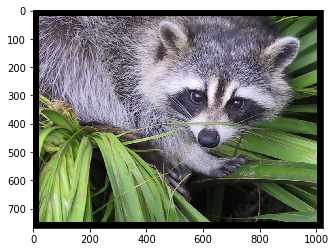

In [20]:
raccoon[0:20, :, :] = 0
raccoon[-20:-1, :, :] = 0
raccoon[:, 0:20, :] = 0
raccoon[:, -20:-1, :] = 0
plt.imshow(raccoon)

### Solution 1

Do it again without losing pixels and generate then a raccoon1 array/image

In [21]:
raccoon = np.array(scipy.misc.face())
print("shape of raccoon = ", raccoon.shape)
n0, n1, n2 = raccoon.shape
raccoon1 = np.zeros((n0+40, n1+40, n2), dtype = np.uint8)
raccoon1[20:20+n0, 20:20+n1, :] = raccoon[:,:,:]
print("shape of raccoon1 = ", raccoon1.shape)
plt.imshow(raccoon1)

shape of raccoon =  (768, 1024, 3)
shape of raccoon1 =  (808, 1064, 3)


### Solution 2.A

Mask the face of the raccoon with a grey circle (centered of radius 240 at location 690 260 of the raccoon1 image; grey color code is for example (120 120 120))

In [22]:
raccoon2A = raccoon1.copy()

def anonymise_raccoon1_loop():
    x_center = 260
    y_center = 690
    radius = 240
    x_max, y_max, z = raccoon2A.shape
    for i in range(x_max):
        for j in range(y_max):
            if ((j - y_center)**2 + (i-x_center)**2) <= radius**2:
                raccoon2A[i, j, :] = 120
                
%timeit anonymise_raccoon1_loop()
plt.imshow(raccoon2A)

610 ms ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Solution 2.A.2 (vectorization and broadcasting)¶

7.07 ms ± 650 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


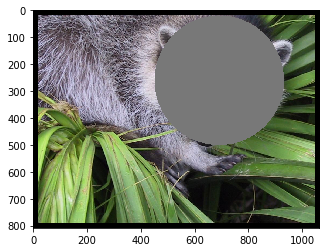

In [23]:
raccoon2B = raccoon1.copy()

def annonymize_raccon1_vect():

    """ 
    i) build two matrix distance
    ii) build a condition (ie distance < radius)
    iii) affectation of point within tha satisfy the condition to 120
    
    for i) we use broadcasting (see e.g. https://i.stack.imgur.com/JcKv1.png)
    """
    
    x_center = 260
    y_center = 690
    radius = 240
    nb_lines, nb_cols, z = raccoon2B.shape
    x, y = np.ogrid[0:nb_lines, 0:nb_cols]
    
    cond = ((x-x_center)**2 + (y- y_center)**2 < radius**2)
    raccoon2B[cond, :] = 120

%timeit annonymize_raccon1_vect()
plt.imshow(raccoon2B)

### Solution 2.B

Mask the face of the raccon with a grey square by using NumPy broadcast capabilities (height and width 480 and same center as before)

31.9 µs ± 809 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


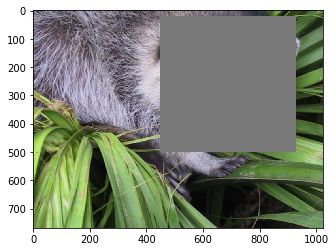

In [29]:
raccoon2B = raccoon1.copy()

def annonymize_raccon1_rectangle():
    x_center = 260
    y_center = 690
    radius = 240
   
    raccoon2B[x_center-radius:x_center+radius, y_center-radius:y_center+radius] = 120

%timeit annonymize_raccon1_rectangle()
plt.imshow(raccoon2B)

### Solution 3

We propose to smooth the image : the value of a pixel of the smoothed image is the
the average of the values of its neighborhood (ie the 8 neighbors + itself).

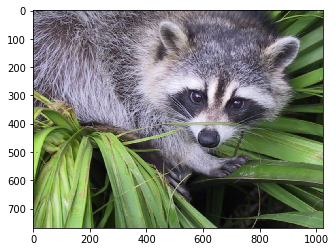

In [25]:
import scipy.misc
raccoon = scipy.misc.face().astype(np.uint16)
n0, n1, n2 = raccoon.shape
raccoon1 = np.zeros((n0, n1, n2), dtype = np.uint8)
for i in range(n0):
    for j in range(n1):
        if ((i!=0) and (i!=n0-1) and (j!=0) and (j!=n1-1)):
            tmp = (
                raccoon[i, j] + raccoon[i+1, j] + raccoon[i-1, j] + raccoon[i, j+1] + raccoon[i, j-1]
                + raccoon[i+1, j+1] + raccoon[i-1, j-1] + raccoon[i+1, j-1] + raccoon[i-1, j+1])
            raccoon1[i, j] = tmp/9
plt.imshow(raccoon1)

## Extra : 
- Try to optimize (vectorization can be a solution)


- You can check what is a "sum area table" (or integral image) https://en.wikipedia.org/wiki/Summed-area_table and how to use it in our example.
- compute the area image (check the "cumsum" numpy function)
- use it to smooth your image.

### Solution extra

In [ ]:
def smooth_basic(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    for i in range(n0):
        for j in range(n1):
            if ((i!=0) and (i!=n0-1) and (j!=0) and (j!=n1-1)):
                tmp = (
                    img[i, j] + img[i+1, j] + img[i-1, j] + img[i, j+1] + img[i, j-1] +
                    img[i+1, j+1] + img[i-1, j-1] + img[i+1, j-1] + img[i-1, j+1])
                img1[i, j] = tmp/9
    return img1.astype(np.uint8)


def smooth_vect(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    img1[1:n0-1, 1:n1-1] = (
        img[1:n0-1,1:n1-1] + img[2:n0, 1:n1-1] + img[0:n0-2, 1:n1-1] + img[1:n0-1, 2:n1] +
        img[1:n0-1, 0:n1-2] + img[2:n0, 2:n1] + img[0:n0-2, 0:n1-2] + img[2:n0, 0:n1-2] +
        img[0:n0-2, 2:n1])
    img1 = img1/9
    return img1.astype(np.uint8)


def smooth_fftconvolve(img):
    from scipy import signal
    img = img.astype(np.uint16)
    square8 = np.ones((3, 3), dtype=np.uint16)
    for i in range(3):
        img[:, :, i] = signal.fftconvolve(img[:, :, i], square8, mode='same')/9
    return img.astype(np.uint8)
    
    
def smooth_convolve2d(img):
    from scipy import signal
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    square8 = np.ones((3, 3), dtype=np.uint16)
    for i in range(3):
        img1[:, :, i] = signal.convolve2d(img[:, :, i], square8, mode='same')/9
    return img1.astype(np.uint8)
   
    
def smooth_sum_img(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    sum_area = np.cumsum(np.cumsum(img, axis=0), axis=1)
    img1[2:n0-1, 2:n1-1] = (
        sum_area[3:n0, 3:n1] + sum_area[0:n0-3, 0:n1-3] - 
        sum_area[3:n0, 0:n1-3] - sum_area[0:n0-3, 3:n1])
    img1 = img1/9
    return img1.astype(np.uint8)

    
def smooth_loop(method, niter, img):
    for i in range(niter):
        img = method(img)
    return img
    
import scipy.misc
raccoon = scipy.misc.face()
%timeit smooth_loop(smooth_basic, 1, raccoon)
%timeit smooth_loop(smooth_vect, 1, raccoon)
%timeit smooth_loop(smooth_fftconvolve, 1, raccoon)
%timeit smooth_loop(smooth_convolve2d, 1, raccoon)
%timeit smooth_loop(smooth_sum_img, 1, raccoon)

raccoon = smooth_loop(smooth_vect, 20, raccoon)
plt.imshow(raccoon)

/tmp/ipykernel_8384/2392561278.py:65: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raccoon = scipy.misc.face()


4.92 s ± 93.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.12 ms ± 243 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
61.6 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
